In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Data Collection

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
test.shape

(5681, 11)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Data Preprocessing

In [11]:
# Handling Missing Values
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

In [15]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [17]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [18]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [20]:
# Handling Categorical Variables

In [21]:
train.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)

# EDA

In [22]:
# dtale
import dtale
import dtale.app as dtale_app

In [23]:
dtale_app.USE_COLAB = True
dtale.show(train)

In [24]:
# klib
import klib

<Axes: title={'center': 'Feature-correlation (pearson)'}>

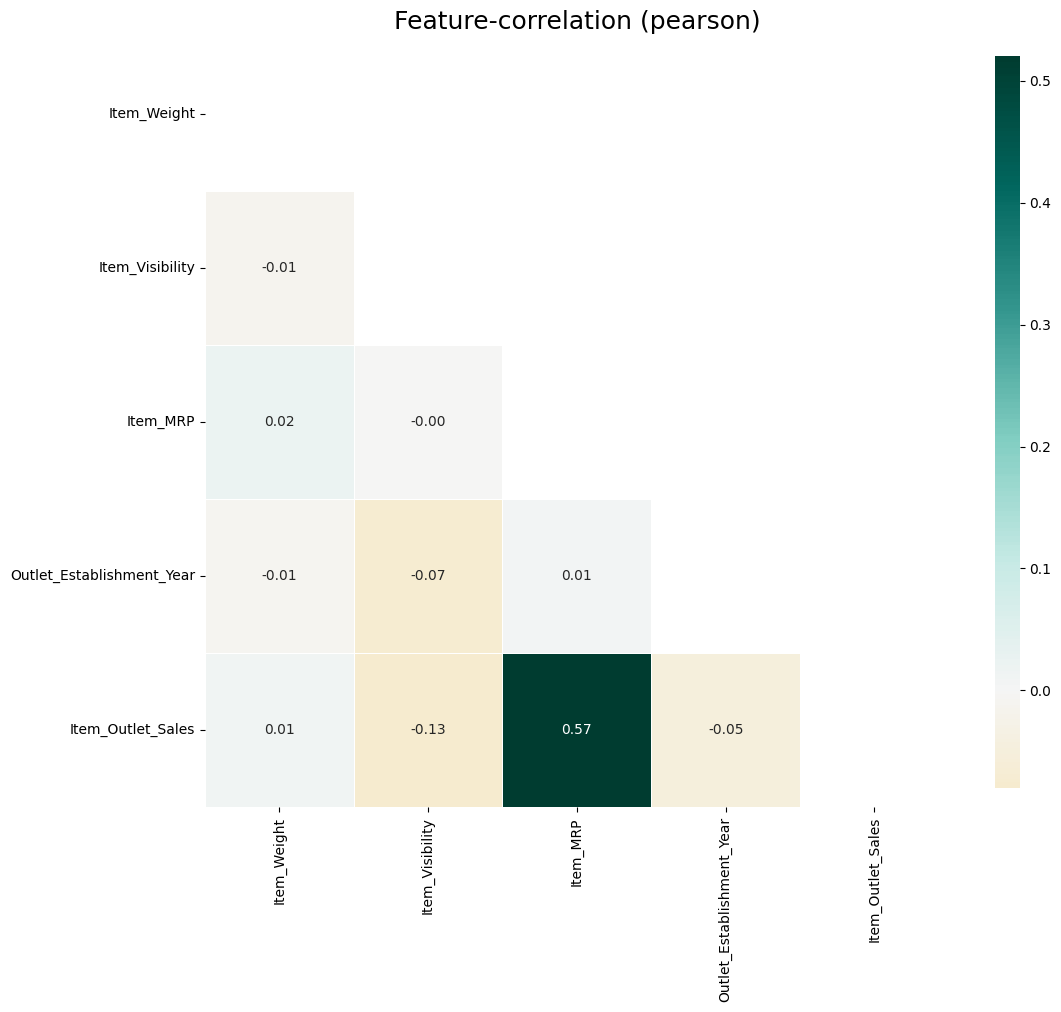

In [25]:
klib.corr_plot(train)  # Show correlations

In [26]:
klib.corr_mat(train)  # Show correlations

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

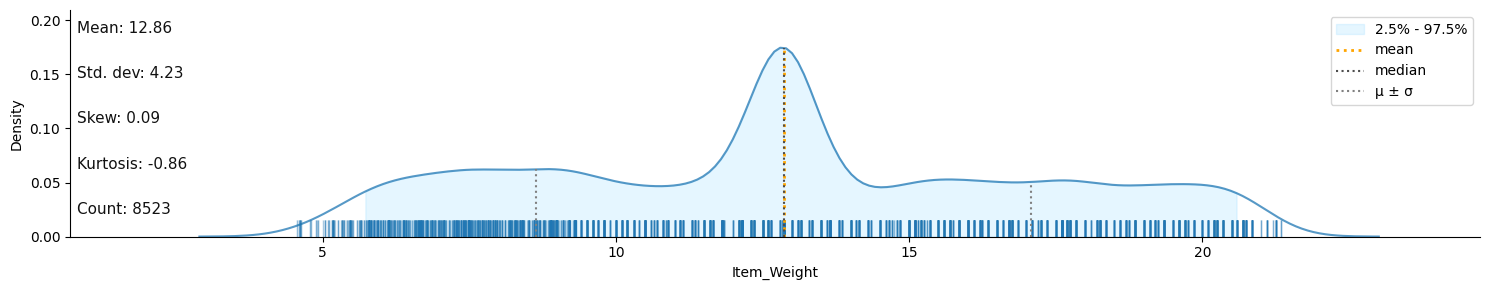

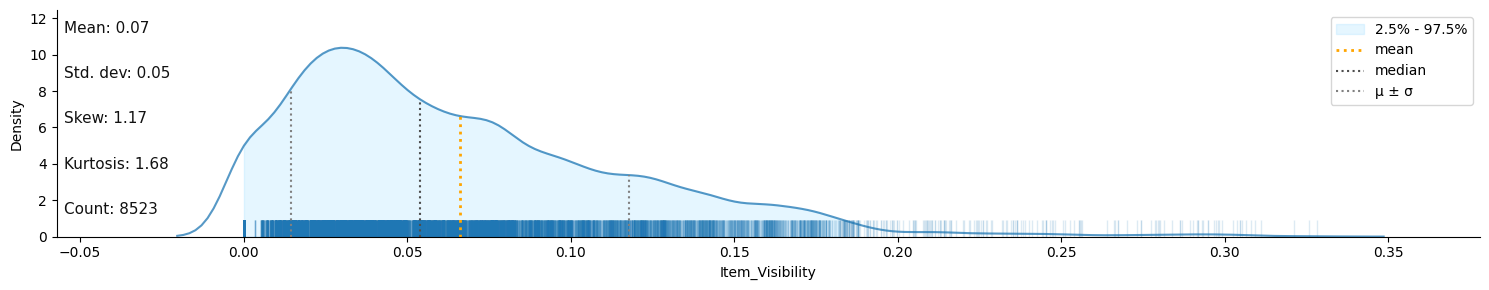

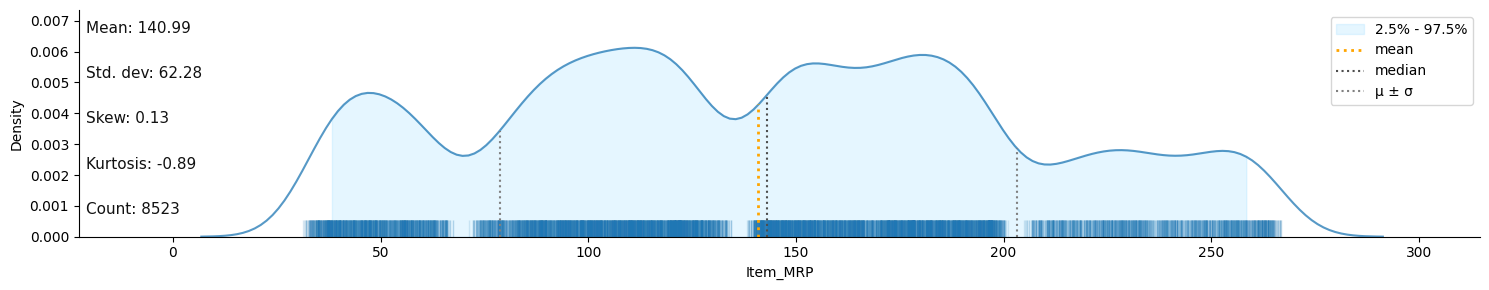

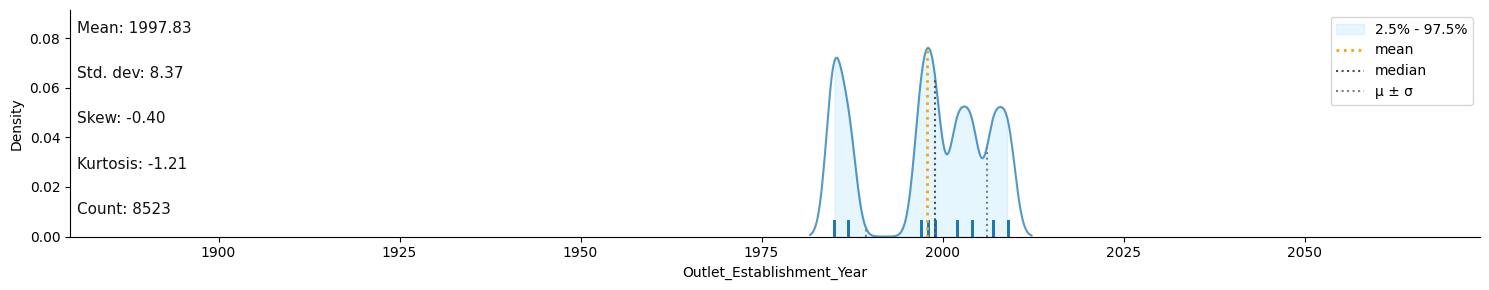

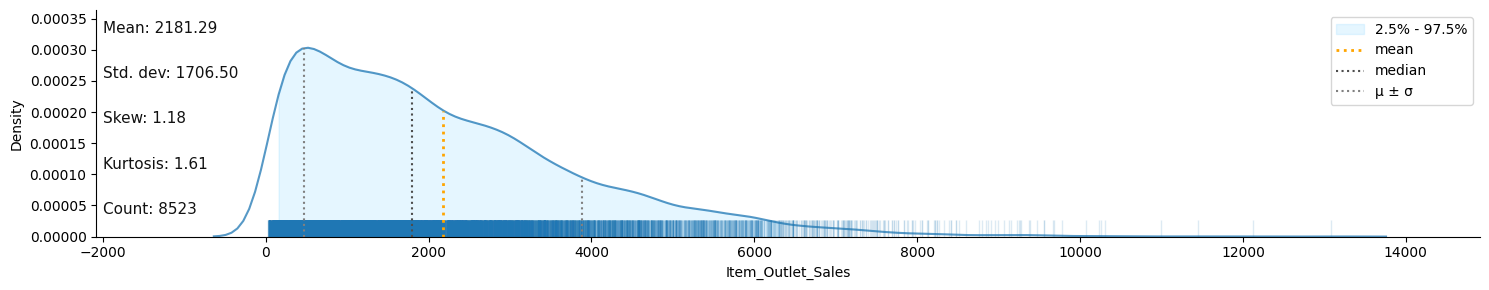

In [27]:
klib.dist_plot(train)  # Visualize distributions

In [28]:
# Univariate Analysis
# seaborn
import seaborn as sns

In [29]:
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

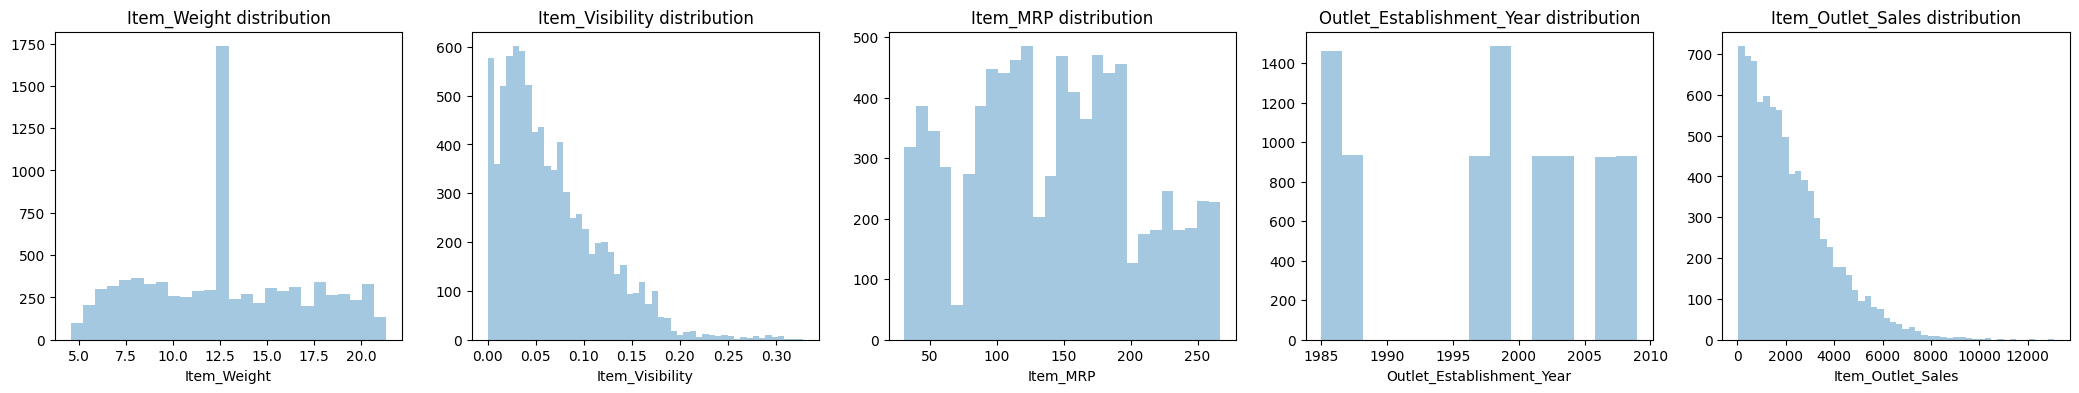

In [30]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(numeric_cols):
    sns.distplot(train[col], kde=False, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

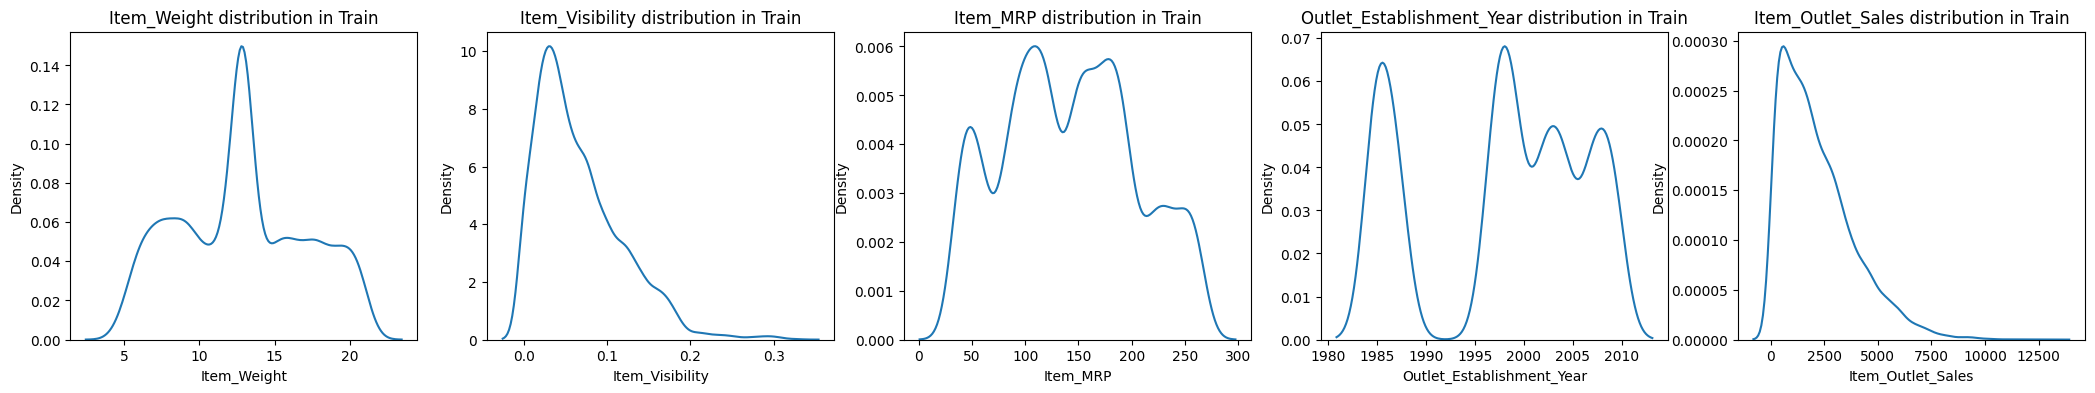

In [31]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(numeric_cols):
    sns.kdeplot(data=train, x=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Train')

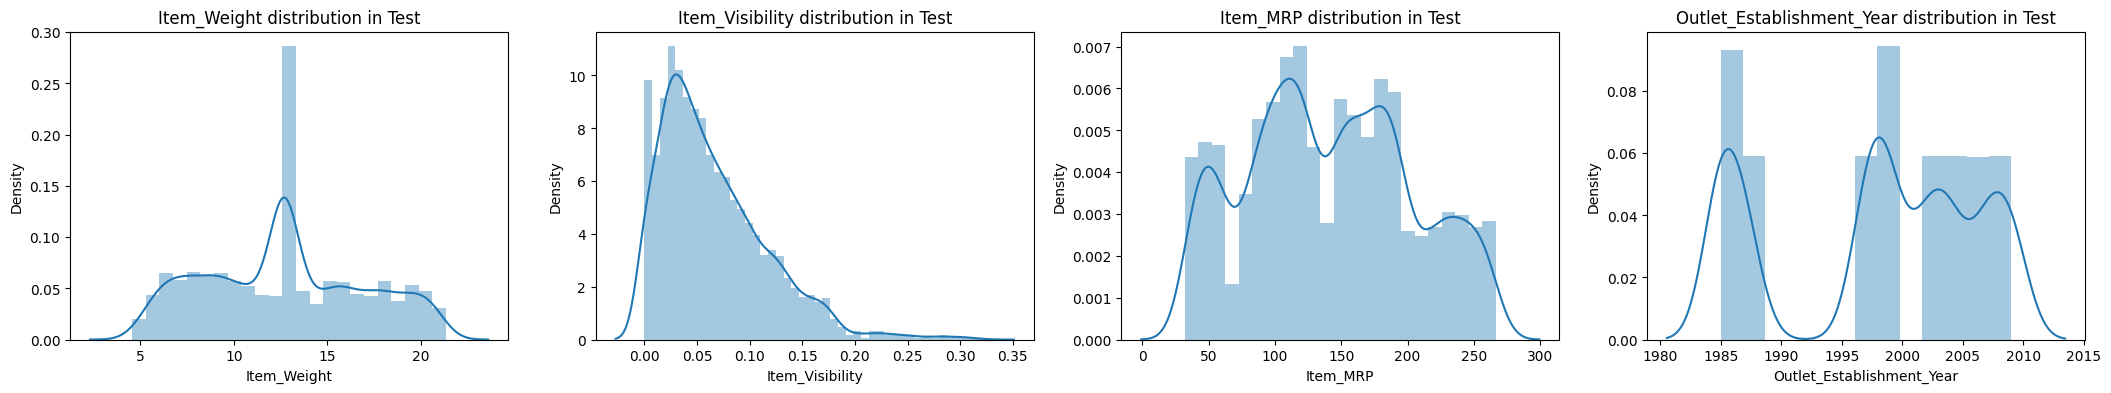

In [32]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']):
    sns.distplot(test[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Test')

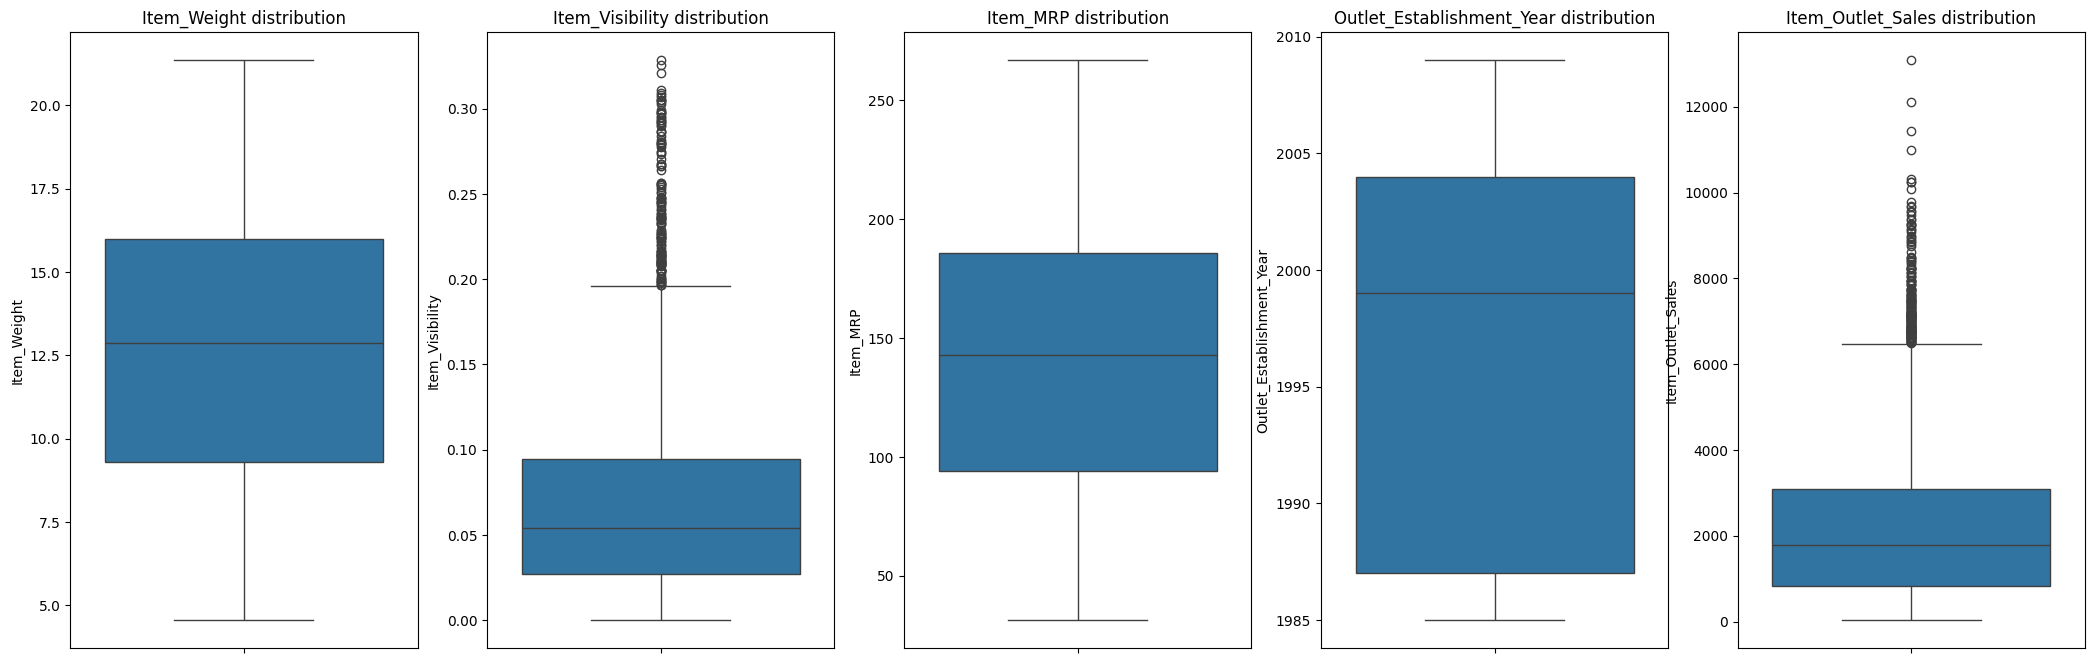

In [33]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.boxplot(data=train, y=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

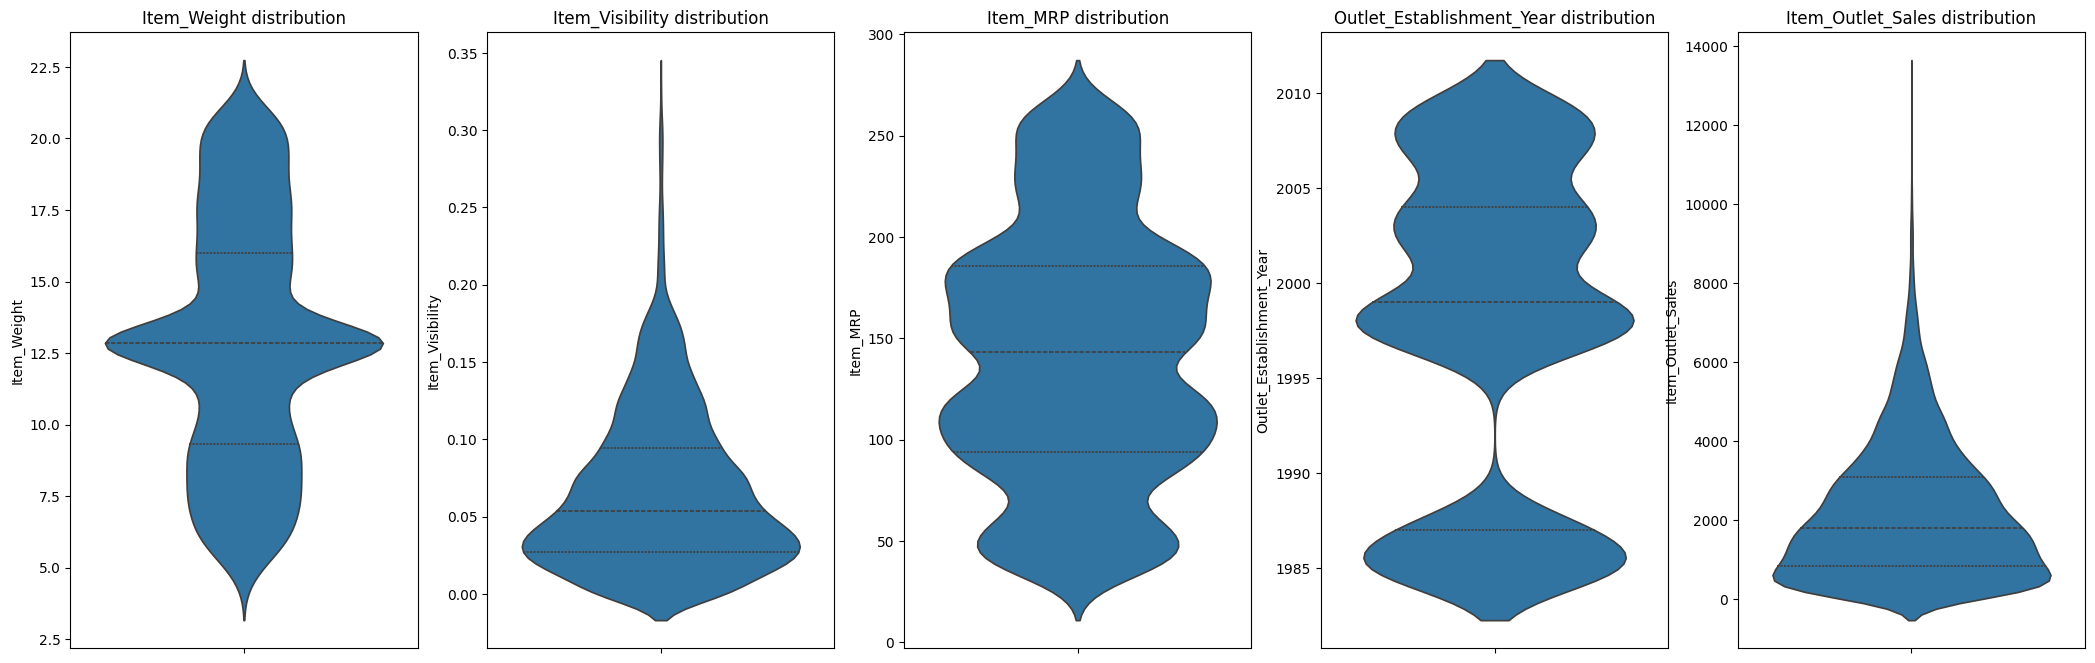

In [34]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.violinplot(data=train, y=col, ax=ax[index], inner='quartile')
    ax[index].set_title(f'{col} distribution')

In [35]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [36]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [37]:
# Bivariate Analysis

In [38]:
target = "Item_Outlet_Sales"

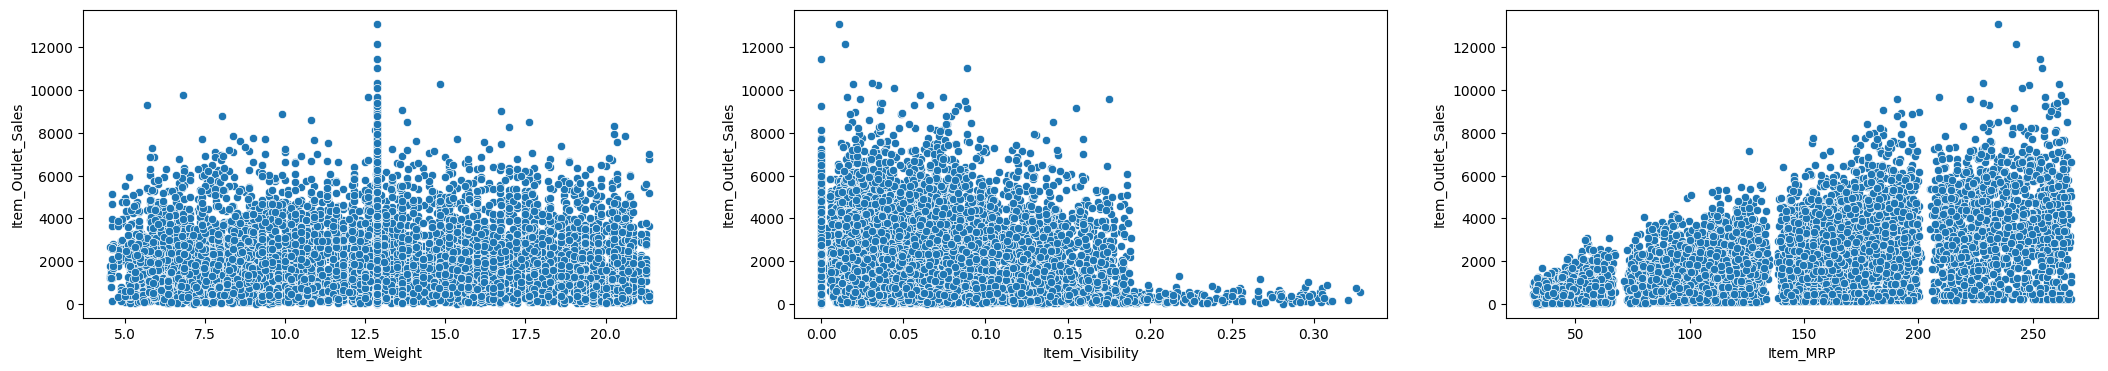

In [39]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train,x=col, y=target, ax=ax[index])

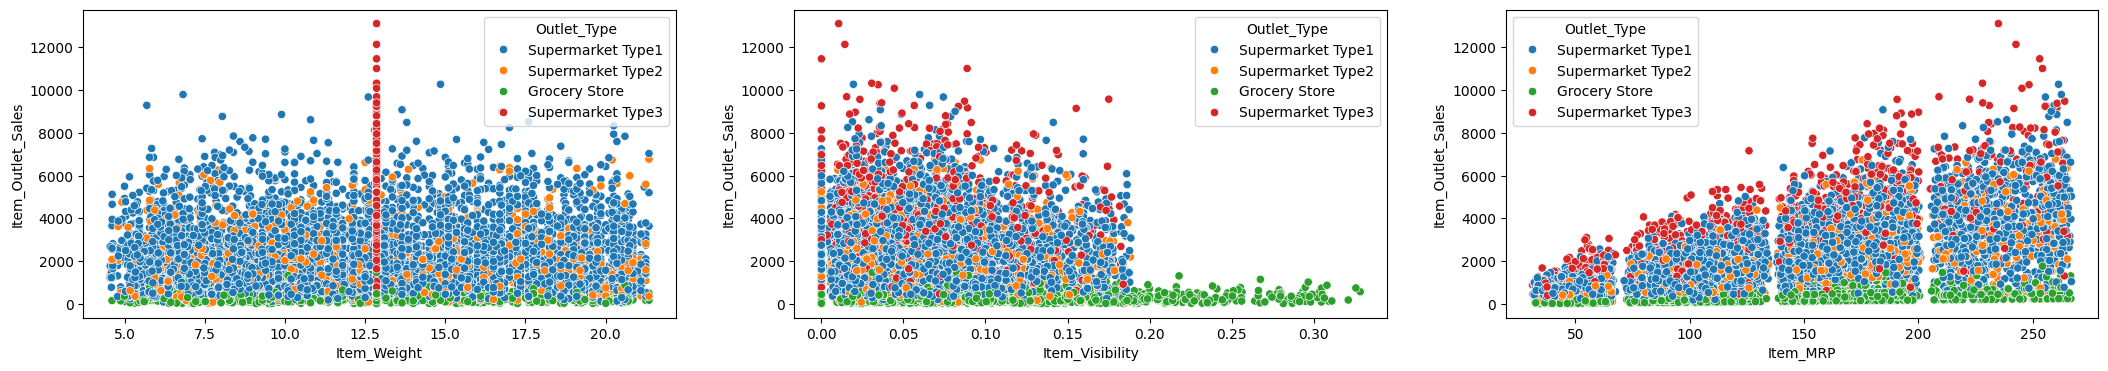

In [40]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train,x=col, y=target, ax=ax[index], hue='Outlet_Type')

<Axes: >

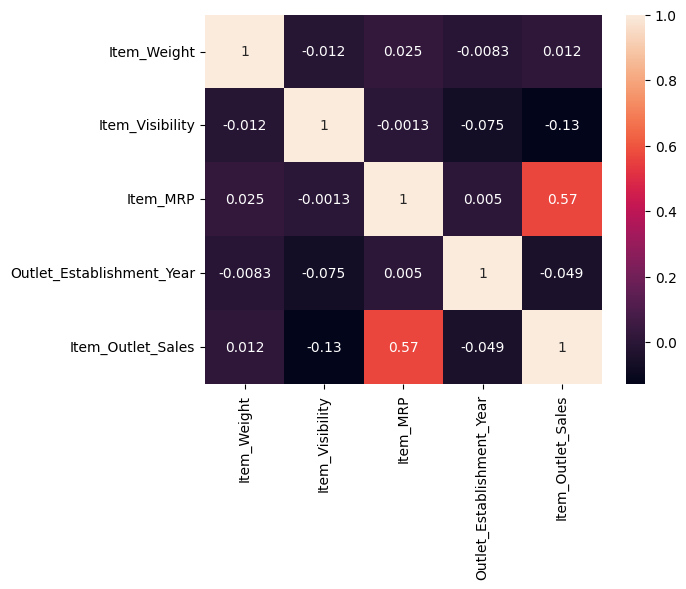

In [41]:
sns.heatmap(train.select_dtypes(include=['number']).corr(), annot=True)

# Data Cleaning

In [42]:
klib.data_cleaning(train)

Shape of cleaned data: (8523, 12) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.52 MB (-66.67%)



,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,FDX07,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,OUT010,1998,Medium,Tier 3,Grocery Store,732.380005
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.521805,OUT013,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.156998,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.133202,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.597656


# Feature Engineering

In [43]:
# Label Encoding for Categorical Features

In [44]:
encoder = LabelEncoder()

In [45]:
train['Item_Identifier']  = encoder.fit_transform(train['Item_Identifier'])
train['Item_Fat_Content']  = encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type']  = encoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier']  = encoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size']  = encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']  = encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']  = encoder.fit_transform(train['Outlet_Type'])

In [46]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [47]:
test['Item_Identifier']  = encoder.fit_transform(test['Item_Identifier'])
test['Item_Fat_Content']  = encoder.fit_transform(test['Item_Fat_Content'])
test['Item_Type']  = encoder.fit_transform(test['Item_Type'])
test['Outlet_Identifier']  = encoder.fit_transform(test['Outlet_Identifier'])
test['Outlet_Size']  = encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']  = encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']  = encoder.fit_transform(test['Outlet_Type'])

In [48]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [49]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [50]:
train.to_csv("preprocessed_data.csv")
test.to_csv("preprocessed_test.csv")

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


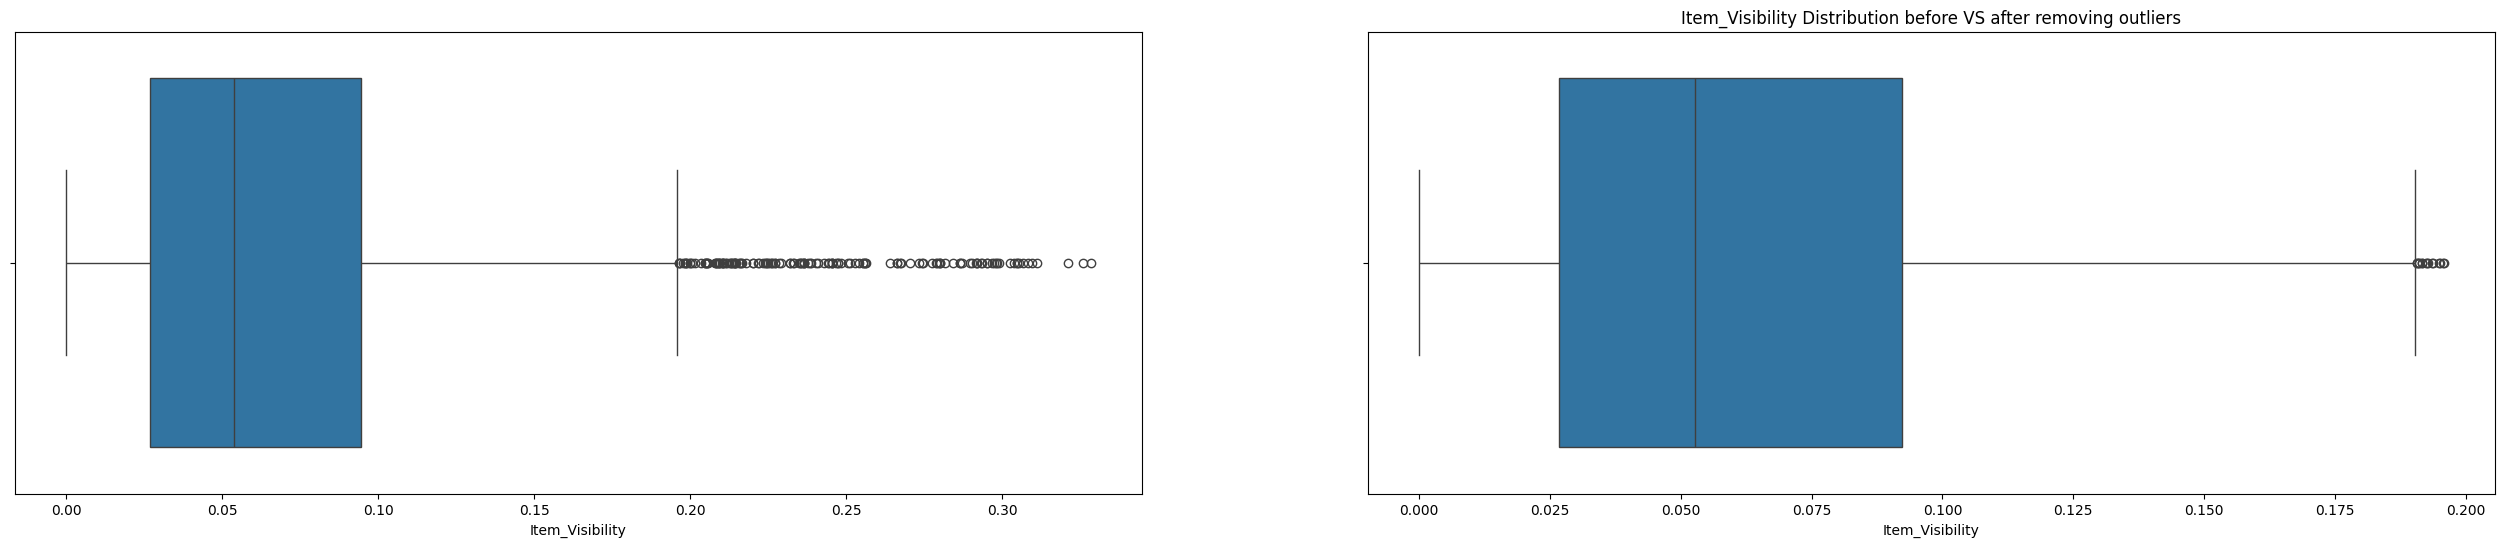

In [51]:
# function to detect outliers using the IQR method

def detect_outliers(df, feature):
    Q1  = df[feature].quantile(0.25)
    Q3  = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = detect_outliers(train, "Item_Visibility")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=train['Item_Visibility'], ax=ax[0])

# removing outliers using the above function
train = train[(train['Item_Visibility'] > lower) & (train['Item_Visibility'] < upper)] #train
test = test[(test['Item_Visibility'] > lower) & (test['Item_Visibility'] < upper)]     #test

sns.boxplot(x=train['Item_Visibility'], ax=ax[1])
plt.title('Item_Visibility Distribution before VS after removing outliers')
plt.show()

Upper limit:  6499.2067
Lower limit:  -2499.7460999999994


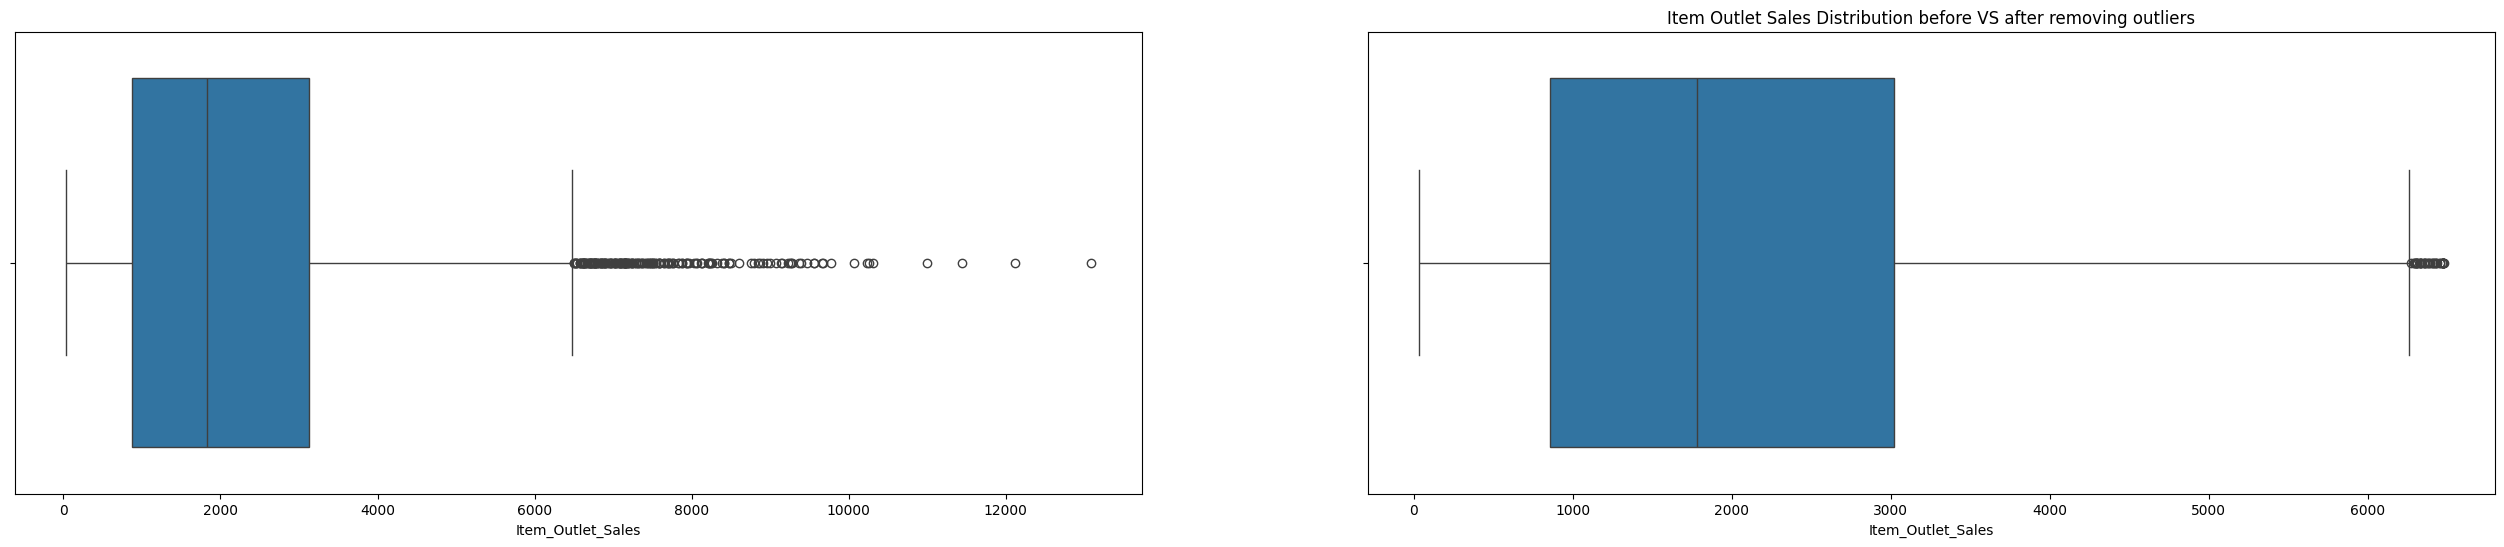

In [52]:
# detect outliers in the Item_Outlet_Sales feature
upper, lower = detect_outliers(train, "Item_Outlet_Sales")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=train['Item_Outlet_Sales'], ax=ax[0])

# removing outliers using the same function
train = train[(train['Item_Outlet_Sales'] > lower) & (train['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=train['Item_Outlet_Sales'], ax=ax[1])
plt.title('Item Outlet Sales Distribution before VS after removing outliers')
plt.show()

In [53]:
# # Splitting Data into Train & Test Sets
from sklearn.model_selection import train_test_split

In [54]:
# Define features (X) and target (y)
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [55]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (6554, 11)
Test set size: (1639, 11)


In [56]:
# Standarization

In [57]:
X.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000
mean,780.098621,12.863932,0.352008,0.063221,7.230807,139.104030,4.763212,1998.089711,1.166972,1.106432,1.201391
std,450.147050,4.266983,0.477626,0.046285,4.205862,61.536438,2.844965,8.286946,0.602483,0.808825,0.770211
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,394.000000,9.300000,0.000000,0.026818,4.000000,92.980400,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,783.000000,12.857645,0.000000,0.052729,6.000000,141.147000,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1168.000000,16.100000,1.000000,0.092783,10.000000,183.663400,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1558.000000,21.350000,1.000000,0.195721,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [58]:
# Create a scaler instance
scaler = StandardScaler()

In [59]:
X_train_std = scaler.fit_transform(X_train)

In [60]:
X_train_std

array([[ 1.25975049,  1.38378891, -0.7313649 , ...,  1.38716801,
        -1.36471995, -0.25503423],
       [ 0.59176322,  0.03615703,  1.36730653, ..., -0.26974818,
        -0.1301617 , -0.25503423],
       [ 0.23446771, -1.92435439, -0.7313649 , ...,  1.38716801,
        -0.1301617 , -0.25503423],
       ...,
       [-1.31899105,  0.78614347,  1.36730653, ..., -0.26974818,
        -0.1301617 , -0.25503423],
       [ 1.06667776,  1.17285523, -0.7313649 , ..., -0.26974818,
        -1.36471995, -0.25503423],
       [-0.68429218,  0.00279323,  1.36730653, ...,  1.38716801,
        -1.36471995, -1.56191016]])

In [61]:
X_test_std = scaler.fit_transform(X_test)

In [62]:
X_test_std

array([[ 1.19352998, -1.57101453, -0.75991996, ...,  1.36559195,
        -1.3814385 , -0.28679199],
       [ 0.77627037, -1.22172976, -0.75991996, ..., -0.30720716,
         1.10666886,  0.98019473],
       [-1.00879751,  1.67920921,  1.31592806, ..., -0.30720716,
        -1.3814385 , -0.28679199],
       ...,
       [ 0.86552376, -0.26647107,  1.31592806, ..., -0.30720716,
         1.10666886,  0.98019473],
       [ 0.07116855, -0.01853861,  1.31592806, ..., -0.30720716,
         1.10666886,  2.24718146],
       [ 1.35195476,  1.38618507, -0.75991996, ..., -0.30720716,
        -0.13738482, -0.28679199]])

In [63]:
y_train

1766    3125.9310
8196    1186.4556
6669    1670.4922
5132     639.1680
4439     407.4696
          ...    
5437     293.6178
5608    1565.9616
896     1058.6220
7911    2450.1440
7567     395.4852
Name: Item_Outlet_Sales, Length: 6554, dtype: float64

In [64]:
y_test

5904     517.9924
6009    2241.0828
2202     755.6830
6927    2209.1244
5439    1581.9408
          ...    
2449      93.2120
8110      49.2692
7246    1842.9344
87      3285.7230
7732    5635.3312
Name: Item_Outlet_Sales, Length: 1639, dtype: float64

# Train Part

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# Initialize Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

Model Performance Comparison:

                          RMSE  R² Score
Linear Regression  1109.789665  0.471610
Decision Tree      1419.560438  0.135468
Random Forest      1051.667056  0.525507
XGBoost            1119.839021  0.461997
Gradient Boosting   996.190073  0.574247


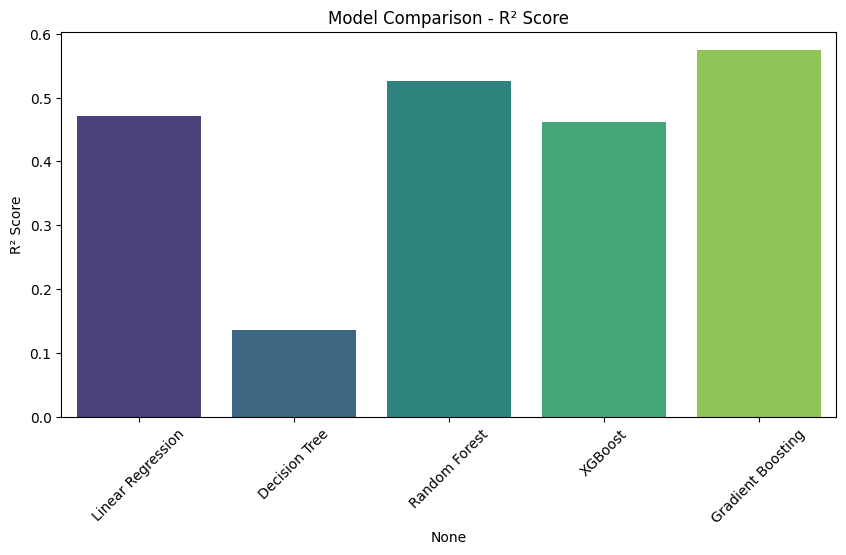

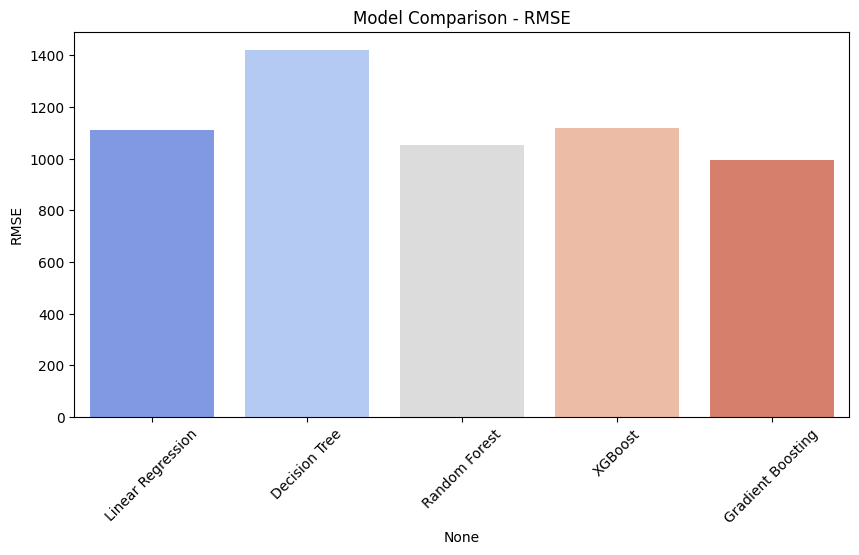

In [67]:
# Train and Evaluate Models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
    r2 = r2_score(y_test, Y_pred)
    results[name] = {"RMSE": rmse, "R² Score": r2}

# Convert Results to DataFrame
results_df = pd.DataFrame(results).T

# Display Model Performance
print("Model Performance Comparison:\n")
print(results_df)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="viridis")
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="coolwarm")
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

# Hyper Parameter Tunning & Optimization

In [68]:
from sklearn.model_selection import GridSearchCV

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best R² Score (Training): 0.5704052568383139
Optimized Random Forest Performance:
RMSE: 1003.6054348491673
R² Score: 0.5678851906310662


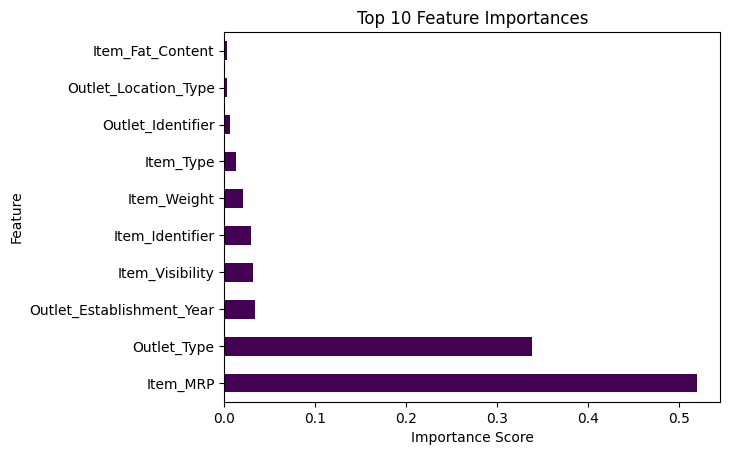

In [69]:
# Define Parameter Grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter Tuning using GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Performance
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (Training):", grid_search.best_score_)

# Train Model with Best Parameters
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
Y_pred_best = best_rf.predict(X_test)

# Evaluate Optimized Model
rmse_best = np.sqrt(mean_squared_error(y_test, Y_pred_best))
r2_best = r2_score(y_test, Y_pred_best)
print("Optimized Random Forest Performance:")
print("RMSE:", rmse_best)
print("R² Score:", r2_best)

# Feature Importance Visualization
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', colormap='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best R² Score (Training) for RF: 0.5704052568383139
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best R² Score (Training) for GBR: 0.5774763838272212
Optimized Random Forest Performance:
RMSE: 1003.6054348491673
R² Score: 0.5678851906310662
Optimized Gradient Boosting Performance:
RMSE: 996.190072963255
R² Score: 0.5742471527745237


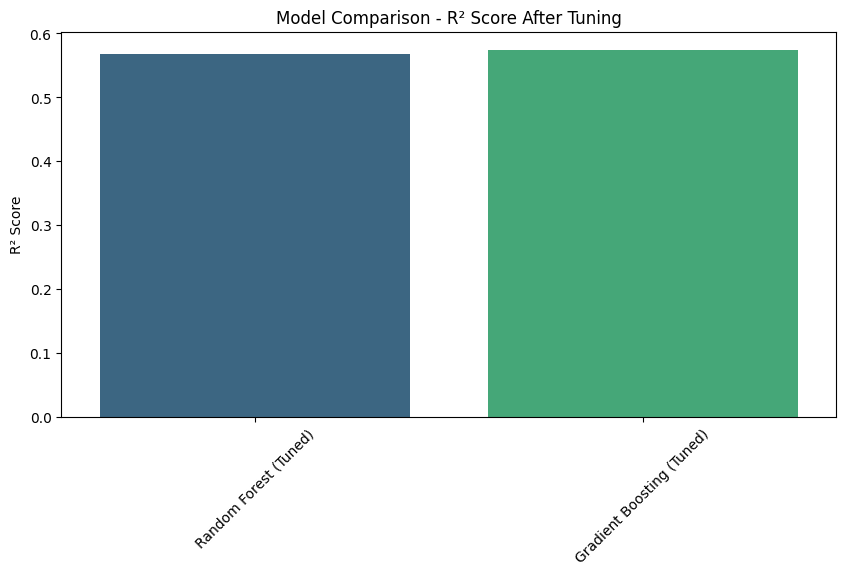

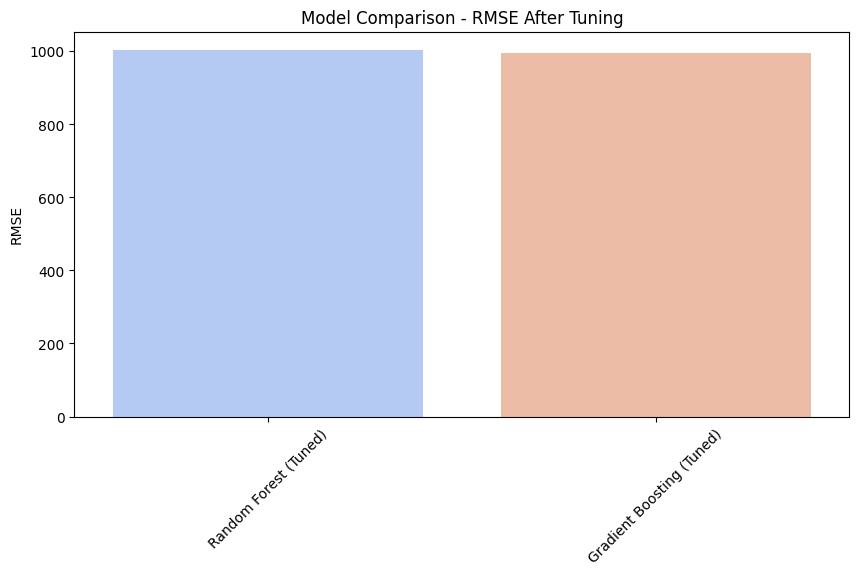

In [70]:
# Define Parameter Grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define Parameter Grid for Gradient Boosting Regressor
gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Hyperparameter Tuning using GridSearchCV for Random Forest
rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Hyperparameter Tuning using GridSearchCV for Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr_grid_search = GridSearchCV(gbr, gbr_param_grid, cv=5, scoring='r2', n_jobs=-1)
gbr_grid_search.fit(X_train, y_train)

# Best Parameters and Performance
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best R² Score (Training) for RF:", rf_grid_search.best_score_)
print("Best Parameters for Gradient Boosting:", gbr_grid_search.best_params_)
print("Best R² Score (Training) for GBR:", gbr_grid_search.best_score_)

# Train Models with Best Parameters
best_rf = RandomForestRegressor(**rf_grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
Y_pred_rf = best_rf.predict(X_test)

best_gbr = GradientBoostingRegressor(**gbr_grid_search.best_params_, random_state=42)
best_gbr.fit(X_train, y_train)
Y_pred_gbr = best_gbr.predict(X_test)

# Evaluate Optimized Models
rmse_rf = np.sqrt(mean_squared_error(y_test, Y_pred_rf))
r2_rf = r2_score(y_test, Y_pred_rf)

rmse_gbr = np.sqrt(mean_squared_error(y_test, Y_pred_gbr))
r2_gbr = r2_score(y_test, Y_pred_gbr)

print("Optimized Random Forest Performance:")
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)

print("Optimized Gradient Boosting Performance:")
print("RMSE:", rmse_gbr)
print("R² Score:", r2_gbr)

# Performance Comparison Visualization
models = ['Random Forest (Tuned)', 'Gradient Boosting (Tuned)']
rmse_values = [rmse_rf, rmse_gbr]
r2_values = [r2_rf, r2_gbr]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=r2_values, palette="viridis")
plt.title("Model Comparison - R² Score After Tuning")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=rmse_values, palette="coolwarm")
plt.title("Model Comparison - RMSE After Tuning")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

# Test Part

In [71]:
input1 = (743,18.600,0,0.039356,5,246.3802,9,1999,1,0,1)
new_input = np.asanyarray(input1, dtype = float)
prediction = best_rf.predict(new_input.reshape(1, -1))
print(prediction)

# Find and print max and min predicted values
print(f"Sales Value is between {prediction-714.42} and {prediction+714.42}")

[3788.15941138]
Sales Value is between [3073.73941138] and [4502.57941138]


In [72]:
new_input = np.asanyarray(input1, dtype = float)
prediction = best_gbr.predict(new_input.reshape(1, -1))
print(prediction)

# Find and print max and min predicted values
print(f"Sales Value is between {prediction-714.42} and {prediction+714.42}")

[3755.03758315]
Sales Value is between [3040.61758315] and [4469.45758315]


In [79]:
new_input = np.asanyarray(input1, dtype=float).reshape(1, -1)

# Predict and Print Results
for name, model in models.items():
    prediction = model.predict(new_input)[0]
    min_value = prediction - 714.42
    max_value = prediction + 714.42

    print(f"\n{name} Prediction: {prediction:.2f}")
    print(f"Sales Value is between {min_value:.2f} and {max_value:.2f}")


Linear Regression Prediction: 3995.30
Sales Value is between 3280.88 and 4709.72

Decision Tree Prediction: 4655.27
Sales Value is between 3940.85 and 5369.69

Random Forest Prediction: 4171.69
Sales Value is between 3457.27 and 4886.11

XGBoost Prediction: 3602.53
Sales Value is between 2888.11 and 4316.95

Gradient Boosting Prediction: 3755.04
Sales Value is between 3040.62 and 4469.46


In [81]:
import pickle
import os

model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

for name, model in models.items():
    filename = os.path.join(model_dir, f"{name.replace(' ', '_')}.pkl")  # Format filename
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Saved {name} model to {filename}")

Saved Linear Regression model to saved_models\Linear_Regression.pkl
Saved Decision Tree model to saved_models\Decision_Tree.pkl
Saved Random Forest model to saved_models\Random_Forest.pkl
Saved XGBoost model to saved_models\XGBoost.pkl
Saved Gradient Boosting model to saved_models\Gradient_Boosting.pkl


In [82]:
import pickle
pickle.dump(best_rf, open('saved_models/Best_Random_Forest.pkl', 'wb'))

In [83]:
import pickle
pickle.dump(best_gbr, open('saved_models/Best_Gradient_Boosting.pkl', 'wb'))